# An example of additive model in Python

## Xu Ren

I'm a graduate student in Statistics. Now I'm working on some additive models. Additive model is an extension of linear regression model. In linear regression we assume the effect of each variable is linear, while in additive model we are trying to model the nonlinear effect of variables. i.e.

Linear regression: $\text{E}[y|X] = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p$

Additive model: $\text{E}[y|X] = \beta_0 + f_1(X_1) + f_2(X_2) + ... + f_p(X_p)$

where $f_1$, $f_2$, ..., $f_p$ are nonlinear functions like spline or local regression.

In this notebook, I'm trying to fit additive model on an example dataset, namely boston housing data. 

In [1]:
from pygam import LinearGAM
from pygam.utils import generate_X_grid
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

I'm going to use boston housing data as an example to fit an additive model. First import dataset and explore it a little bit. 

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.feature_names  ## these are the independent variables (predictors) in boston dataset

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [4]:
## convert predictors into a dataframe
X_df = pd.DataFrame(boston.data)
X_df.columns = boston.feature_names
X_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
## This is the housing price. 
y = pd.Series(boston.target)

Now the dataset is ready, we are going to fit the model.

In [6]:
fit = LinearGAM().gridsearch(X_df, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


Here is a summary of fit:

In [7]:
fit.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      89.441
Link Function:                     IdentityLink Log Likelihood:                                  -1616.431
Number of Samples:                          506 AIC:                                              3413.744
                                                AICc:                                            3453.6419
                                                GCV:                                                13.538
                                                Scale:                                              9.3128
                                                Pseudo R-Squared:                                   0.9092
Feature Function   Data Type      Num

### There are 13 variables in total, but here we only show the nonlinear relationship of 3 of them. 

In [8]:
## generate X values for prediction and plots
Xgrid = generate_X_grid(fit)

In [9]:
# partial_dependence function returns the predicted values and confidence intervals
# we make prediction on the first 3 predictors
pred1,confi1 = fit.partial_dependence(Xgrid, feature = 1, width = 0.95)
pred2,confi2 = fit.partial_dependence(Xgrid, feature = 2, width = 0.95)
pred3,confi3 = fit.partial_dependence(Xgrid, feature = 3, width = 0.95)

Make plots:

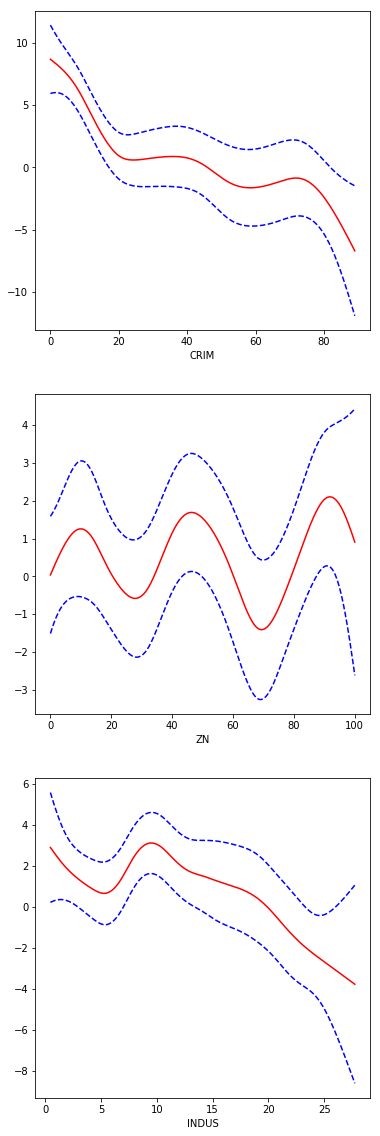

In [10]:
plt.subplot(311)
plt.plot(Xgrid[:,0], pred1, c = 'r')
plt.plot(Xgrid[:,0], confi1[0][:, 0], c = 'b', ls = '--')
plt.plot(Xgrid[:,0], confi1[0][:, 1], c = 'b', ls = '--')
plt.xlabel("CRIM")

plt.subplot(312)
plt.plot(Xgrid[:,1], pred2, c = 'r')
plt.plot(Xgrid[:,1], confi2[0][:, 0], c = 'b', ls = '--')
plt.plot(Xgrid[:,1], confi2[0][:, 1], c = 'b', ls = '--')
plt.xlabel("ZN")

plt.subplot(313)
plt.plot(Xgrid[:,2], pred3, c = 'r')
plt.plot(Xgrid[:,2], confi3[0][:, 0], c = 'b', ls = '--')
plt.plot(Xgrid[:,2], confi3[0][:, 1], c = 'b', ls = '--')
plt.xlabel("INDUS")

f = plt.gcf()
f.set_size_inches(6,20)

From the plots, we can see that additive model allow us to model the nonlinear trend. It is more flexible than linear regression model.

I'm familiar with additive models, but this is my first time to run additive models in Python. I used to do it in R using mgcv package, but of course there are more things to explore in Python. This is just a start, and I will continue to do some more things in the future.

## References

1.Pablo Oberhauser.
pyGAM : Getting Started with Generalized Additive Models in Python 
https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f

2.Daniel Servén, & Charlie Brummitt. (2018, March 27). 
pyGAM: Generalized Additive Models in Python. Zenodo. DOI: 10.5281/zenodo.1208723
